# DX 602 Week 10 Homework

## Introduction

In this homework, you will practice exploratory analysis using Pandas, and review previous material in this module.

The first ten problems of this homework will be manually graded due to their visual nature.
The remaining problems will be graded automatically like usual.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Shared Data

The following red wine data set is from the paper ["Modeling wine preferences by data mining from physicochemical properties"](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf).

In [3]:
red_wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Problems

### Problem 1 (manually graded)

Plot histograms of every column of the red wine data set in the `red_wine` variable above.
Make sure to adjust the spacing for legibility so that the labels do not overlap the charts.

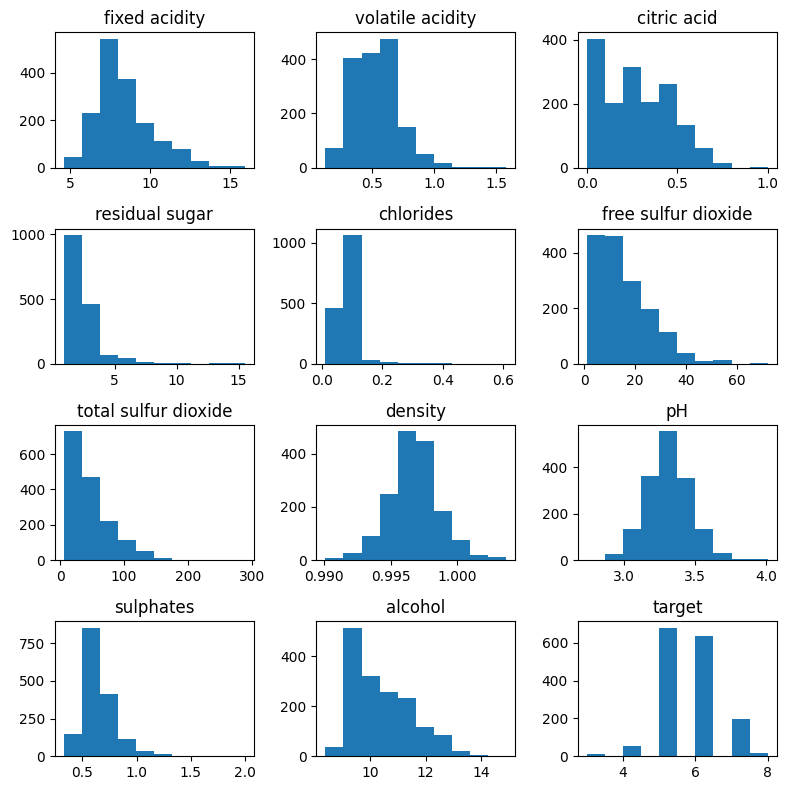

In [4]:
# YOUR CHANGES HERE

red_wine.hist(figsize=(8,8), grid=False)
#plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.tight_layout()
None

<div style="page-break-after: always;"></div>

### Problem 2 (manually graded)

Plot a scatter plot of the fixed acidity and citric acid columns of the red wine data set in the `red_wine` variable above.
Make sure that both axes are labeled.

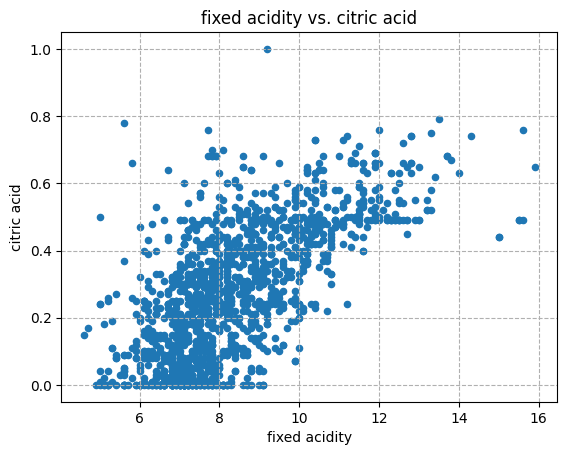

In [5]:
# YOUR CHANGES HERE

red_wine.plot.scatter("fixed acidity", "citric acid")
plt.title('fixed acidity vs. citric acid')
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.grid(True, linestyle='--')
None

<div style="page-break-after: always;"></div>

### Problem 3 (manually graded)

Repeat the scatter plot of the fixed acidity and citric acid columns of the red wine data set.
This time, make the y axis start from zero.

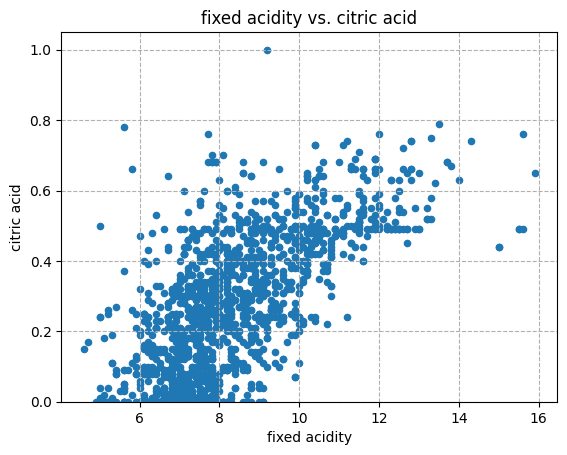

In [6]:
# YOUR CHANGES HERE

ax = red_wine.plot.scatter("fixed acidity", "citric acid")
ax.set_title('fixed acidity vs. citric acid')
ax.set_xlabel('fixed acidity')
ax.set_ylabel('citric acid')
ax.grid(True, linestyle='--')
ax.set_ylim(bottom=0)
None

<div style="page-break-after: always;"></div>

### Problem 4 (manually graded)

Plot a histogram of the `target` column of the red wine data set.
(This column was supposed to represent the quality of the wine.)

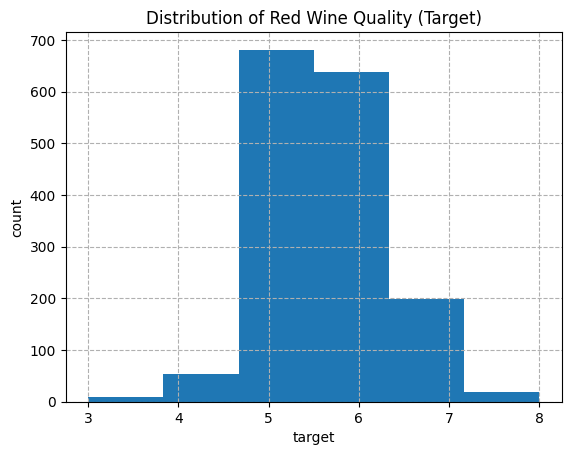

In [7]:
# YOUR CHANGES HERE

ax = red_wine["target"].plot.hist(bins=len(red_wine["target"].unique()))
ax.grid(True, linestyle='--')
ax.set_xlabel("target")
ax.set_ylabel("count")
ax.set_title('Distribution of Red Wine Quality (Target)')
None

<div style="page-break-after: always;"></div>

### Problem 5 (manually graded)

In the video "Using Subplots with Pandas", the following chart plotted the average of each input column as a function of the abalone target column "Rings".
Reproduce that chart with the red wine data set using its target column instead.

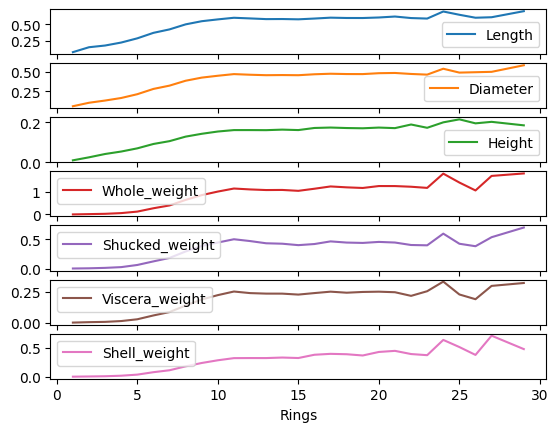

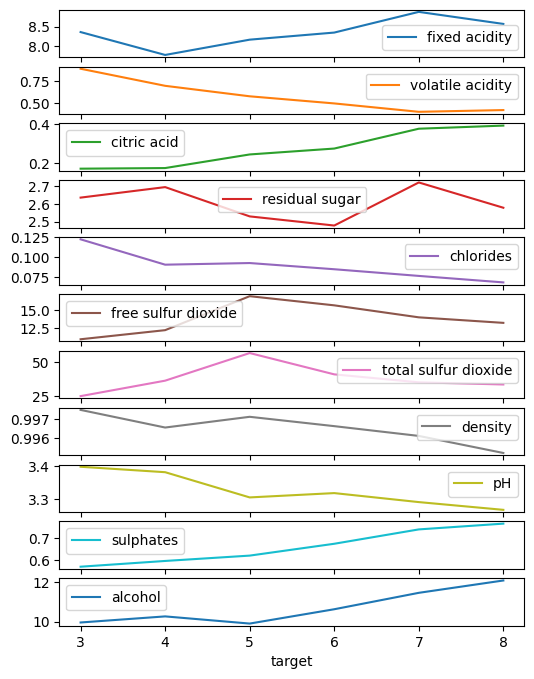

In [8]:
# YOUR CHANGES HERE

_ = red_wine.groupby("target").mean(numeric_only=True).plot(subplots=True, figsize=(6,8))

### Problem 6 (manually graded)

Plot the correlation matrix of the red wine data set as a heat map.

Hint: this visualization was performed for the Palmer penguins data set in the video "Quick Visualizations pf the Palmer Penguins.

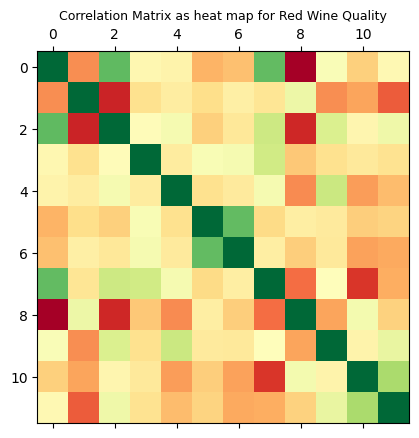

In [43]:
# YOUR CHANGES HERE

plt.matshow(red_wine.corr(numeric_only=True), cmap="RdYlGn", aspect='auto')
plt.title('Correlation Matrix as heat map for Red Wine Quality', fontsize=9)
None

<div style="page-break-after: always;"></div>

### Problem 7 (manually graded)

Plot a box plot of the alcohol column grouping the data by the target column.

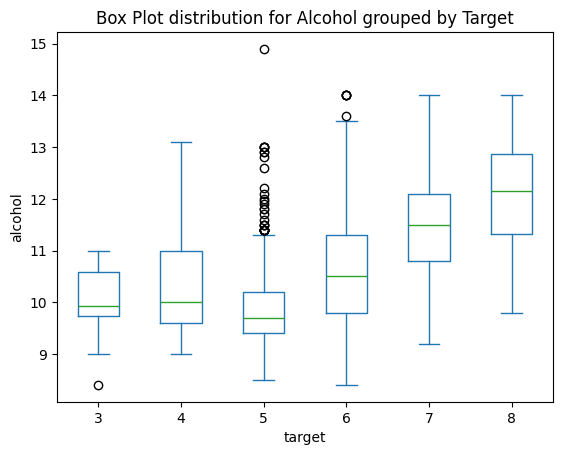

In [10]:
# YOUR CHANGES HERE

red_wine.plot.box(column="alcohol", by="target")
plt.title('Box Plot distribution for Alcohol grouped by Target')
plt.xlabel("target")
plt.ylabel("alcohol")
None

<div style="page-break-after: always;"></div>

### Problem 8 (manually graded)

Hexagonal bin plots are an alternative to scatter plots that helps visualize density instead of individual points.
Make a hexagonal bin plot of the residual sugar and alcohol in the red wine data set.

Hint: pandas has built-in support for hexagonal bin plots.
The default grid size that pandas uses is fairly small, so you may want to adjust it to your taste.

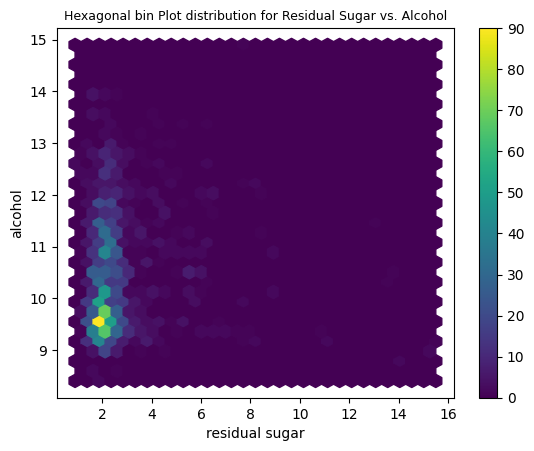

In [11]:
# YOUR CHANGES HERE

red_wine.plot.hexbin(x="residual sugar", y="alcohol", gridsize=30, cmap='viridis')
plt.title('Hexagonal bin Plot distribution for Residual Sugar vs. Alcohol', fontsize=9)
None

<div style="page-break-after: always;"></div>

### Problem 9 (manually graded)

Make a scatter plot of the red wine data set's target column and each of the other columns in that data set. 
Make one chart for each of the other columns.

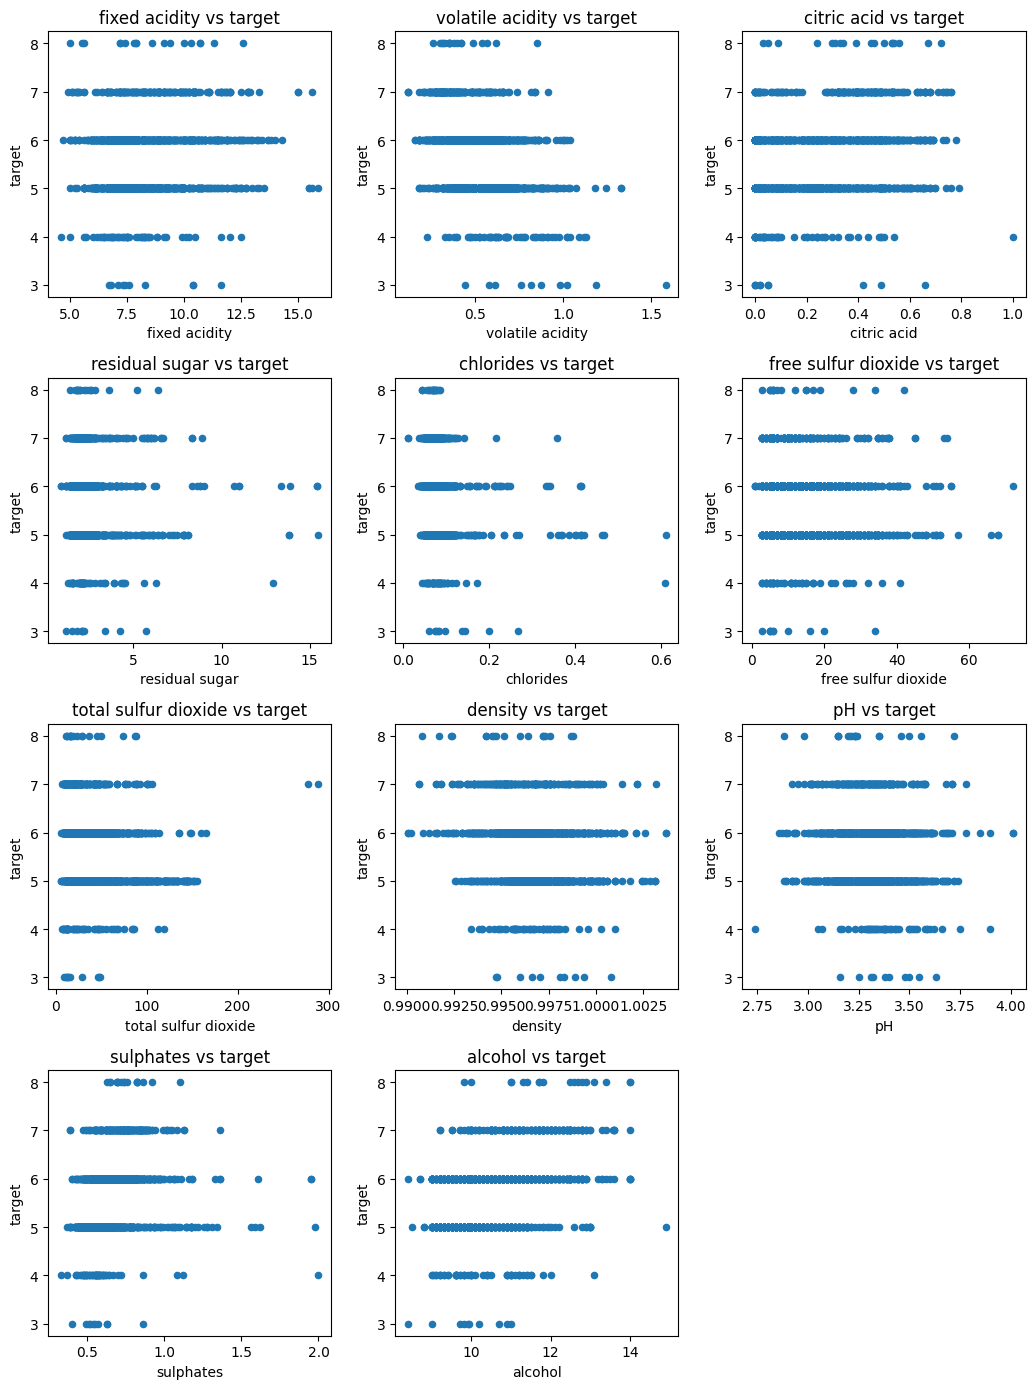

In [40]:
# YOUR CHANGES HERE

plot_cols = [c for c in red_wine.columns if c != 'target']
num_cols=3
num_rows = (len(plot_cols) + num_cols-1) // num_cols
plt.figure(figsize=(num_cols*3.5, num_rows*3.5))
for (i, c) in enumerate(plot_cols):
    plt.subplot(num_rows, num_cols, i+1)
    red_wine.plot.scatter(c, "target", ax=plt.gca())
    plt.title(f"{c} vs target")

plt.tight_layout()

<div style="page-break-after: always;"></div>

### Problem 10 (manually graded)

Pick a pair of input columns in the red wine data set that looks interesting when colored by the target column.
By interesting, the target values (colors) should be visibly different for some combination of your chosen input columns.

Hint: use scatter matrix to investigate possible columns, but don't leave it in your notebook as it will make the autograder very slow.

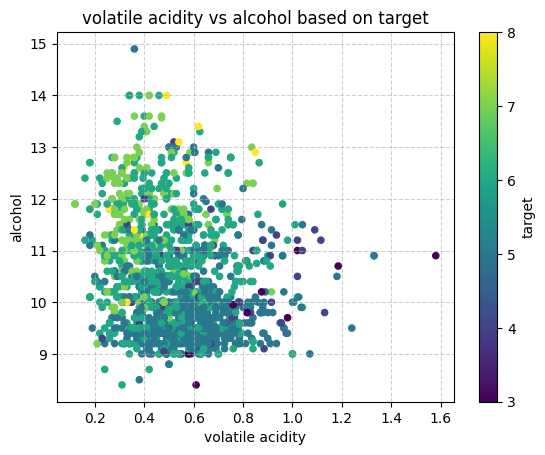

In [35]:
# YOUR CHANGES HERE

x_column = 'volatile acidity'
y_column = 'alcohol'
red_wine.plot.scatter(x_column, y_column, c="target", colormap='viridis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"{x_column} vs {y_column} based on target")
plt.show()
None

<div style="page-break-after: always;"></div>

### Problem 11 (automatically graded)

Set `p11` to the value of $(3 + \mathrm{sin}(2))^5$.

In [14]:
# YOUR CHANGES HERE

p11 = math.pow((3 + math.sin(2)), 5)

In [15]:
p11

913.0479132098069

### Problem 12 (automatically graded)

Write a function `p12` that takes in a sequence of strings and returns a list of the strings starting with the prefix "input_".
The list should be in the same order as the input sequence.

In [16]:
# YOUR CHANGES HERE

def p12(column_names):
    return [name for name in column_names if name.startswith("input")]

In [17]:
# should return ["input_0", "input_1"]
p12(["input_0", "input_1", "target"])

['input_0', 'input_1']

### Problem 13 (automatically graded)

Sort the list `p13` so that the tuples are sorted in order of their second entry (the strings).

In [18]:
# DO NOT CHANGE

p13 = [(0, "zebra"), (1, "yellow"), (2, "xylophone"), (3, "dog"), (4, "elephant"), (5, "apple")]

In [19]:
# YOUR CHANGES HERE

p13 = sorted(p13, key=lambda item: item[1])
p13
    


[(5, 'apple'),
 (3, 'dog'),
 (4, 'elephant'),
 (2, 'xylophone'),
 (1, 'yellow'),
 (0, 'zebra')]

### Problem 14 (automatically graded)

Set `p14` to be a string with the value of the mathematical constant $\pi$ showing exactly 8 digits after the decimal point (include zeros as necessary).
For your convenience, `q14` has a copy of $\pi$.

In [20]:
# DO NOT CHANGE

q14 = math.pi
q14

3.141592653589793

In [21]:
# YOUR CHANGES HERE

p14 = f"{q14:.8f}"
p14

'3.14159265'

### Problem 15 (automatically graded)

Plot the data in variables `x15` and `y15` as a line chart and save it to the file `p15.png`.

In [22]:
# DO NOT CHANGE

x15 = np.linspace(-10, 10)
y15 = x15 ** 2 - 2 * x15 + 1

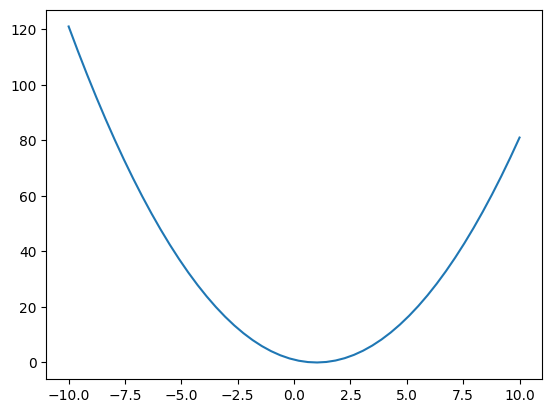

In [23]:
# YOUR CHANGES HERE

plt.plot(x15, y15)
plt.savefig("p15.png")

### Problem 16 (automatically graded)

Set `p16` to be a $253 \times 512$ NumPy array filled entirely with the number 42.

In [24]:
# YOUR CHANGES HERE

p16 = np.full((253, 512), 42)
p16

array([[42, 42, 42, ..., 42, 42, 42],
       [42, 42, 42, ..., 42, 42, 42],
       [42, 42, 42, ..., 42, 42, 42],
       ...,
       [42, 42, 42, ..., 42, 42, 42],
       [42, 42, 42, ..., 42, 42, 42],
       [42, 42, 42, ..., 42, 42, 42]], shape=(253, 512))

### Problem 17 (automatically graded)

Set `p17` to be a view of array `q17` that has size $1000000 \times 3$ where each row is a copy of `q17`.

Hint: use broadcasting.

In [25]:
# DO NOT CHANGE

q17 = np.array([1, 3, 5])
q17

array([1, 3, 5])

In [26]:
# YOUR CHANGES HERE

p17 = np.broadcast_to(q17, (1000000, 3))

In [27]:
p17

array([[1, 3, 5],
       [1, 3, 5],
       [1, 3, 5],
       ...,
       [1, 3, 5],
       [1, 3, 5],
       [1, 3, 5]], shape=(1000000, 3))

### Problem 18 (automatically graded)

Set `p18` to be a Pandas series with the mean of each column of the red wine data set.
The index of `p18` should be the column names of the red wine data set.

In [28]:
# YOUR CHANGES HERE

p18 = red_wine.mean(numeric_only=True)

In [29]:
p18

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
target                   5.636023
dtype: float64

### Problem 19 (automatically graded)

The data frame in `q19` contains the first names of actors and their hometowns.
Set `p19` to be a data frame of pairs of actors with the same hometown.
`p19` should have two columns, `name_1` and `name_2` and the value in `name_1` should before the value in `name_2` to avoid matching an actor with themselves and repeating a pair with both orders.

In [30]:
# DO NOT CHANGE

q19 = pd.DataFrame({"name": ["Mel", "John", "Tom", "Benjamin", "Michael", "Emily", "Tom"],
                    "hometown": ["Peekskill", "Newton", "Concord", "Newton", "Newton", "London", "London"]})
q19

,name,hometown
0,Mel,Peekskill
1,John,Newton
2,Tom,Concord
3,Benjamin,Newton
4,Michael,Newton
5,Emily,London
6,Tom,London


In [31]:
# YOUR CHANGES HERE

p19 = q19.merge(q19, on='hometown', suffixes=('_1', '_2'))
p19 = p19[p19['name_1'] != p19['name_2']]
p19 = p19[p19['name_1'] < p19['name_2']]
p19 = p19[['name_1', 'name_2']]
p19

,name_1,name_2
3,John,Michael
5,Benjamin,John
7,Benjamin,Michael
12,Emily,Tom


### Problem 20 (automatically graded)

Set `p20` to be a data frame with data from the red wine data set indexed on its target where each column has the mean values for that column and target value.
`p20` should have a column for each of the input columns of the red wine data set.

In [32]:
# YOUR CHANGES HERE

p20 = red_wine.groupby("target").mean(numeric_only=True)
p20

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
target,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444
